## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [10]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
    for n in range(nt):
      un[:] = u[:] 
      for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) # déclaration de notre fonction par descritisation
    
    return 0

## Numba accelerator

In [11]:
@njit(fastmath=True) #activation du fastmath
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
    for n in range(nt):
      un[:] = u[:]
      for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
    return 0

## Pyccel accelerator

In [12]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'): # declaration des types des variables

    for n in range(nt):
      for i in range(nx):
        un[i] = u[i]
      for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

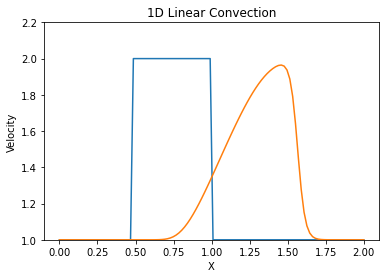

In [14]:
nx = 108  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 400    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

Remarque : 
le changement de la forme de la simuation est du essentiellement aux erreurs commise lors de la descritisation et de la modelisation de l'equation.

## Call Funtions

### Pure function

In [8]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

132 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [13]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

114 µs ± 8.43 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [14]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [15]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

136 µs ± 831 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


    Nous remarquons que grace à numba nous avons pu optimisé le temps d'execution de 132 ms par loop à environ 114 µs ce qui est enorme et tres important si on fait une reflexion par extrapolation sur des equations plus compliqué qui necessite plus de temps pour la compilation.
    A remarquer que en utilisant Pyccel (une fierté nationale marocaine puisque elle est en pleine developpement par nos ingenieurs et nos profs à l'UM6P) nous pouvons optimisé le temps d'excution qui va etre minimisé à 136µs per loop, toutefois numba est plus optimale.
   

![](Pyccel.png)